# **Basic Implmentation:**

**Step-1: Import the Libraries:**

As usual, we start by importing some libraries and modules. The new one that you will observe below is that we will import KMeans from Clusters. 

In [1]:
import numpy as np
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.io import loadmat

**Step-2: Load your Dataset:**

I will use the same dataset we had in Lab2 (Dataset 1 in Logistic Regression Lab). Remember, this dataset was about student admission based on two test scores. In here, I will drop the y label since we are doing unsupervised learning. If you remember, in this lab we created first a function to help us loading the data.  

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

I uploaded the dataset in the files section (the tab at the left). Now, I will load the data. 

In [3]:
data = loadmat('Lab5_Data.mat')

As I mentioned above, I will just use X (the first two columns) and drop the label Y (the last column) since we are doing unsupervised learning. 

In [4]:
x = data['X']
print(x.shape)

(300, 2)


Let's make a scatter plot to see our data

Text(0, 0.5, 'Y')

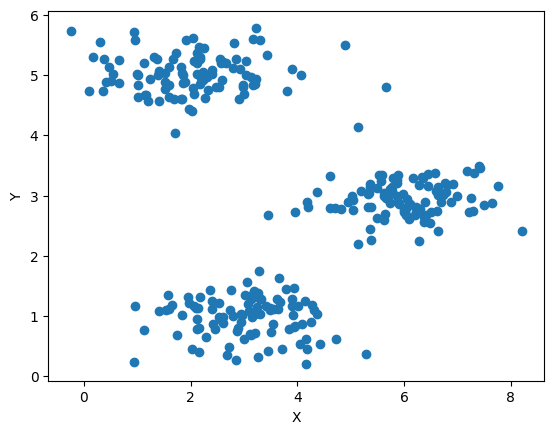

In [5]:
plt.scatter(x[:,0], x[:,1])
plt.xlabel('X')
plt.ylabel('Y')

As you can see, we are now working with unlabeled data

**Step 3: Train your Model:** 

In the following, we will define a KMeans model and use our data to fit the model. 

In [6]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Remarks: 

1. This is the description of the KMeans function: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

2. As you can see in the description, it takes number of clusters (we set it here as 2). 

3. The function also takes initial centroid locations (but here we chose to leave it to the default method: K-means++). 

4. The function also takes n_init: which is the number of times the algorithm run with different centroid locations. Here, we leave it to the default, which is 10. 

**Step 4: Use your Model:** 

Now, we can use our model to do clustering. 

In [7]:
# assign a cluster to each example
yhat = model.predict(x)
# retrieve unique clusters
clusters = unique(yhat)

Let's make a scatter plot to see how the clustering results look like.

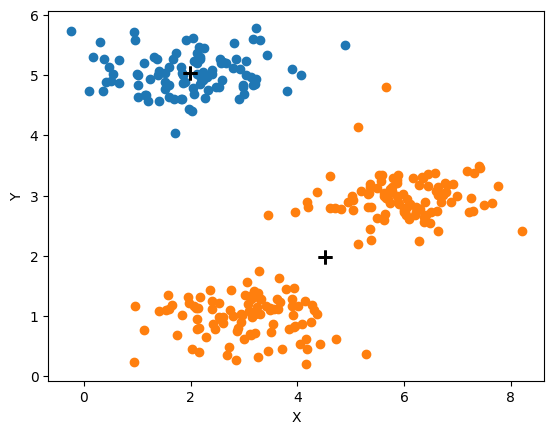

In [8]:
for cluster in clusters:
	# get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
	# create scatter of these samples
  plt.scatter(x[row_ix, 0], x[row_ix, 1])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);
# show the plot
plt.show()

# **Extensions:** 

First, let's see what will happen if we try different number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


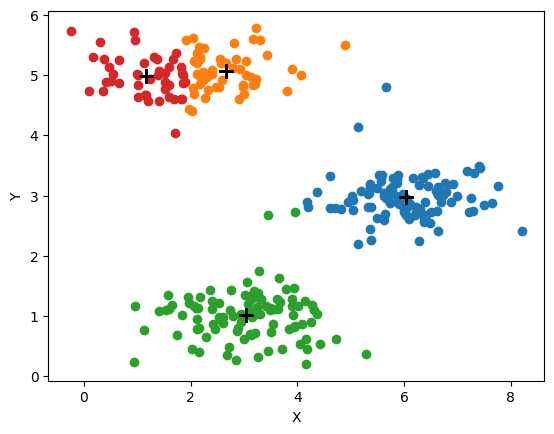

In [12]:
# define the model
model = KMeans(n_clusters=4)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
for cluster in clusters:
	# get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
	# create scatter of these samples
  plt.scatter(x[row_ix, 0], x[row_ix, 1])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);
# show the plot
plt.show()

In the setup above, I introduced 4 clusters and we got the following: 

1. Green Cluster: Students with results > 60 in both Exams. Those can be admitted. 

2. Red Cluster: Students with results < 60 in both exams. Those can be not admitted. 

3. Blue and Purple Clusters: Students with results > 60 in one Exam and < 60 in another Exam. Those can be standby or take another qualifier exam. 

Remember: Number of cluters can be application specific. 

Now, let's see if we can get an Elbow curve to find a good number of clusters. I will import a new library. 

In [13]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

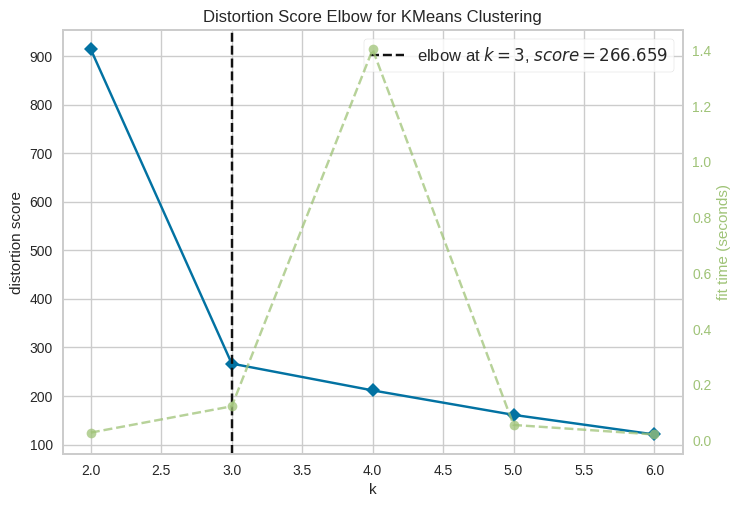

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7))
# Fit the data to the visualizer
visualizer.fit(x) 
# Finalize and render the figure       
visualizer.show()

As you can see above, the optimal K value is 3.

Remarks: 

1. In the code above: we first created an object of KMeans named model. Then, we create an elbow curve visualizer object (visualizer) and define its arguments Kmeans model and the range of K we are examining (here we go from 2 to 6). Then, we fit our model using our data X and show the results. The blue curve is for the elbow curve and the green curve is the time taken to fit the model. The Y-axis is the cost function and the X-axis is the number of clusters K. 

2. The elbow point: K = 3. We got a significant reduction in the cost function when K changed from 2 to 3. After K = 3 the reduction in cost is small. This makes K = 3 a good clustering number. Let's plot the clustering results.  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


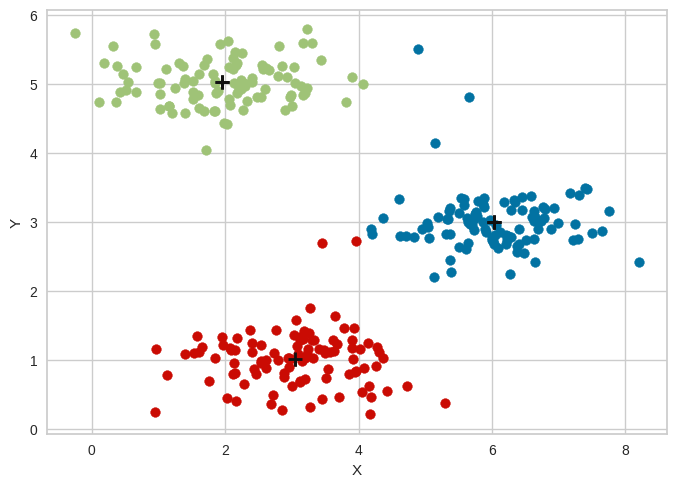

In [15]:
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(x)
# assign a cluster to each example
yhat = model.predict(x)
# retrieve unique clusters
clusters = unique(yhat)
for cluster in clusters:
	# get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
	# create scatter of these samples
  plt.scatter(x[row_ix, 0], x[row_ix, 1])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);
# show the plot
plt.show()

In the results above, the blue clustrer is a definite pass, while other clusters are not that clear. While the elbow method suggested 3 clusters, it seems 4 clussters is a more meaningful choice. Remember: clustering can be application specific.  